In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import sklearn
import pandas as pd



In [ ]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [ ]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [ ]:
california_housing = fetch_california_housing()
x = california_housing['data']
y = california_housing['target']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.75, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [ ]:
x_train.shape[1]

8

SEQUENTIAL MODEL:

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.Dense(1))

 

In [ ]:
model.summary()



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 30)                270       
                                                                 
 dense_14 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=tf.keras.metrics.MeanSquaredError())
history= model.fit(x_train,y_train,batch_size=20,epochs=20, validation_split=0.175)

Epoch 1/20
213/213 [==============================] - 1s 3ms/step - loss: 1178.7924 - mean_squared_error: 1178.7924 - val_loss: 32.4440 - val_mean_squared_error: 32.4440
Epoch 2/20
213/213 [==============================] - 1s 3ms/step - loss: 25.6388 - mean_squared_error: 25.6388 - val_loss: 15.6200 - val_mean_squared_error: 15.6200
Epoch 3/20
213/213 [==============================] - 1s 3ms/step - loss: 14.6792 - mean_squared_error: 14.6792 - val_loss: 8.6440 - val_mean_squared_error: 8.6440
Epoch 4/20
213/213 [==============================] - 1s 3ms/step - loss: 10.6913 - mean_squared_error: 10.6913 - val_loss: 4.4291 - val_mean_squared_error: 4.4291
Epoch 5/20
213/213 [==============================] - 1s 3ms/step - loss: 4.5151 - mean_squared_error: 4.5151 - val_loss: 2.3910 - val_mean_squared_error: 2.3910
Epoch 6/20
213/213 [==============================] - 1s 3ms/step - loss: 5.6535 - mean_squared_error: 5.6535 - val_loss: 1.4703 - val_mean_squared_error: 1.4703
Epoch 7/20
2

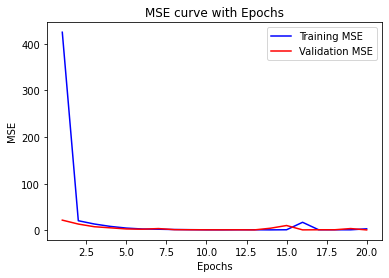

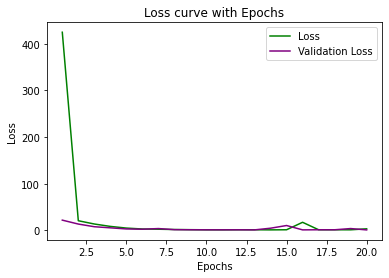

In [ ]:
# Plotting and Visualising

modelmse = history.history["mean_squared_error"]
modelvmse = history.history["val_mean_squared_error"]
modelloss = history.history["loss"]
modelvalloss = history.history["val_loss"]
epochs_list = range(1,21)

plt.plot(epochs_list, modelmse, 'blue', label='Training MSE')
plt.plot(epochs_list, modelvmse, 'red', label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE curve with Epochs')
plt.legend()
plt.show()

#Loss Plot
plt.plot(epochs_list, modelloss, 'green', label="Loss")
plt.plot(epochs_list, modelvalloss, 'purple', label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss curve with Epochs')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(x_test)

from sklearn.metrics import mean_squared_error
rms= np.sqrt(mean_squared_error(y_test, y_pred))

variation = rms/np.mean(y_test)*100
print("Root Mean Squared Error is", rms)
print("Variation is",variation)

Root Mean Squared Error is 1.016972805655956
Variation is 49.19619602379845


In [ ]:
model.evaluate(x_test, y_test)

484/484 [==============================] - 1s 2ms/step - loss: 1.0342 - mean_squared_error: 1.0342


[1.0342340469360352, 1.0342340469360352]

In [ ]:
x.shape

(20640, 8)

In [ ]:
x_train.shape

(5160, 8)

FUNCTIONAL API MODEL:

In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
inputA = tf.keras.layers.Input(shape=[5])
inputB = tf.keras.layers.Input(shape=[6] )
hidden1= tf.keras.layers.Dense(30, activation='relu')(inputB)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.Concatenate()([hidden2, inputA])
outputs = tf.keras.layers.Dense(1, activation='linear')(concat)

functional = tf.keras.models.Model(inputs=[inputA,inputB], outputs=outputs)

functional.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 6)]          0           []                               
                                                                                                  
 dense_24 (Dense)               (None, 30)           210         ['input_10[0][0]']               
                                                                                                  
 dense_25 (Dense)               (None, 30)           930         ['dense_24[0][0]']               
                                                                                                  
 input_9 (InputLayer)           [(None, 5)]          0           []                               
                                                                                            

In [ ]:
functional.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=tf.keras.metrics.MeanSquaredError())
f = functional.fit([x_train[:,:5], x_train[:,2:]],y_train,batch_size=20,epochs=20, validation_split=0.175)

Epoch 1/20
213/213 [==============================] - 1s 3ms/step - loss: 413.6277 - mean_squared_error: 413.6277 - val_loss: 7.5784 - val_mean_squared_error: 7.5784
Epoch 2/20
213/213 [==============================] - 1s 3ms/step - loss: 11.6534 - mean_squared_error: 11.6534 - val_loss: 9.2649 - val_mean_squared_error: 9.2649
Epoch 3/20
213/213 [==============================] - 1s 3ms/step - loss: 176.8132 - mean_squared_error: 176.8132 - val_loss: 679.4395 - val_mean_squared_error: 679.4395
Epoch 4/20
213/213 [==============================] - 1s 3ms/step - loss: 23.8255 - mean_squared_error: 23.8255 - val_loss: 6.0485 - val_mean_squared_error: 6.0485
Epoch 5/20
213/213 [==============================] - 1s 3ms/step - loss: 10.1639 - mean_squared_error: 10.1639 - val_loss: 3.5793 - val_mean_squared_error: 3.5793
Epoch 6/20
213/213 [==============================] - 1s 3ms/step - loss: 4.1756 - mean_squared_error: 4.1756 - val_loss: 3.0950 - val_mean_squared_error: 3.0950
Epoch 7/20

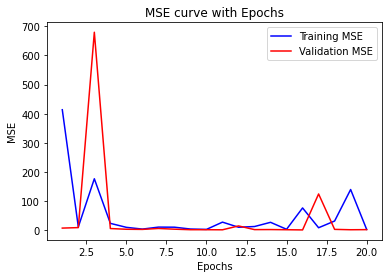

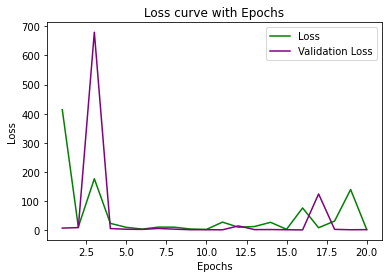

In [ ]:
# Plotting and Visualising

funcmse = f.history["mean_squared_error"]
funcvmse = f.history["val_mean_squared_error"]
funcloss = f.history["loss"]
funcvalloss = f.history["val_loss"]
epochs_list = range(1,21)

plt.plot(epochs_list, funcmse, 'blue', label='Training MSE')
plt.plot(epochs_list, funcvmse, 'red', label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE curve with Epochs')
plt.legend()
plt.show()

#Loss Plot
plt.plot(epochs_list, funcloss, 'green', label="Loss")
plt.plot(epochs_list, funcvalloss, 'purple', label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss curve with Epochs')
plt.legend()
plt.show()

In [ ]:
y_pred_func = functional.predict([x_test[:,:5], x_test[:,2:]])
funcrms= np.sqrt(mean_squared_error(y_test, y_pred_func))

funcvariation = funcrms/np.mean(y_test)*100
print("Root Mean Squared Error is", funcrms)
print("Variation is", funcvariation)

Root Mean Squared Error is 1.471747716367964
Variation is 71.19599339267941


The Accuracy of Sequential model is 49.196 and MSE is 1.0169

The Accuracy of Functional Model is 71.959 and MSE is 1.4717

Thus, the Functional Model works better on the dataset.